In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://drive.g###########################drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path, index_col='Id')

y = data['SalePrice'].copy()
X = data.drop('SalePrice', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1072 to 413
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    961 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          71 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

In [ ]:
y_train.describe()

count      1168.000000
mean     180532.992295
std       79843.911531
min       34900.000000
25%      129000.000000
50%      162000.000000
75%      214925.000000
max      755000.000000
Name: SalePrice, dtype: float64

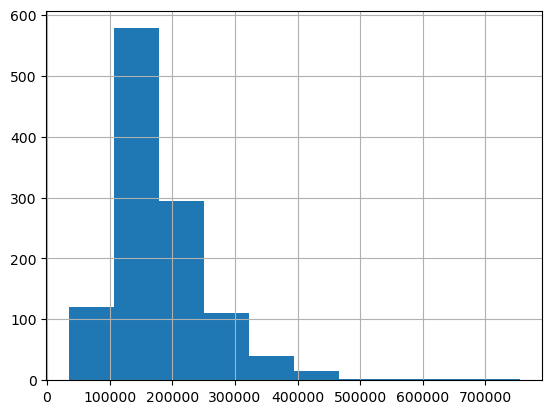

In [ ]:
y_train.hist();

In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

DummyRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

dummy_prediction = dummy.predict(X_train)

errors_df = pd.DataFrame(columns=['mae', 'mape', 'rmse', 'r2'])
errors = []
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_train,
                            y_pred=dummy_prediction)
                 )
errors_df.loc['dummy'] = errors
errors_df

,mae,mape,rmse,r2
dummy,57830.630845,0.368238,79809.724456,0.0


In [ ]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
# pd.concat([X_train['1stFlrSF']* 152, y_train], axis=1)
def dummy2(sq_ft):
    return sq_ft*152
dummy2_pred = dummy2(X_train['1stFlrSF'])
errors = []
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_train,
                            y_pred=dummy2_pred)
                 )
errors_df.loc['dummy2'] = errors
errors_df

,mae,mape,rmse,r2
dummy,57830.630845,0.368238,79809.724456,0.000000
dummy2,45609.882705,0.266285,61821.742689,0.399973


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

nums = X_train.select_dtypes(include='number').columns
cats = X_train.select_dtypes(exclude='number').columns
drop = ['FireplaceQu', 'Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cats),
    (SimpleImputer(), nums),
    ('drop', drop)
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

dtr = make_pipeline(preprocessor, DecisionTreeRegressor())

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_train)

In [ ]:
errors = []
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_train,
                            y_pred=dtr_pred)
                 )
errors_df.loc['dtr'] = errors
errors_df

,mae,mape,rmse,r2
dummy,57830.630845,0.368238,79809.724456,0.000000
dummy2,45609.882705,0.266285,61821.742689,0.399973
dtr,0.000000,0.000000,0.000000,1.000000


In [ ]:
cats[14]

'RoofMatl'

In [ ]:
X_train['RoofMatl'].unique()

array(['CompShg', 'Metal', 'Tar&Grv', 'Membran', 'WdShake', 'WdShngl',
       'Roll'], dtype=object)

In [ ]:
X_test['RoofMatl'].unique()

array(['CompShg', 'WdShake', 'Tar&Grv', 'ClyTile'], dtype=object)

In [ ]:
errors = []
dtr_test_pred = dtr.predict(X_test)
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_test,
                            y_pred=dtr_test_pred)
                 )
errors

[28446.61301369863, 0.16047979699585552, 49649.79860775969, 0.5927174067451166]

In [ ]:
dtr_trimmed = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4))

dtr_trimmed.fit(X_train, y_train)
dtr_trimmed_pred = dtr_trimmed.predict(X_train)

errors = []
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_train,
                            y_pred=dtr_trimmed_pred)
                 )
errors_df.loc['dtr_trimmed'] = errors
errors_df

,mae,mape,rmse,r2
dummy,57830.630845,0.368238,79809.724456,0.000000
dummy2,45609.882705,0.266285,61821.742689,0.399973
dtr,0.000000,0.000000,0.000000,1.000000
dtr_trimmed,20682.501465,0.131759,28875.871016,0.869094


In [ ]:
dtr.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
          'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',...
          'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
          'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
          'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
          'MoSold', 'YrSold'],
         dtype='object')),
                                   ('drop', 'drop',
                                    ['FireplaceQ

In [ ]:
dtr[1].get_depth()

22

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'decisiontreeregressor__max_depth': [5, 10, 15],
    'decisiontreeregressor__max_leaf_nodes': range(20, 161, 20),
    'decisiontreeregressor__min_samples_split': range(5, 51, 5)
}

dtr_search = GridSearchCV(dtr, param_grid, scoring='r2',
              n_jobs=-2,
              verbose=2)
dtr_search.fit(X_train, y_train,
              )
dtr_search_pred = dtr_search.predict(X_train)

errors = []
for metric in (mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score):
    errors.append(metric(y_true=y_train,
                            y_pred=dtr_search_pred)
                 )
errors_df.loc['dtr_search'] = errors
errors_df

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


,mae,mape,rmse,r2
dummy,57830.630845,0.368238,79809.724456,0.000000
dummy2,45609.882705,0.266285,61821.742689,0.399973
dtr,0.000000,0.000000,0.000000,1.000000
dtr_trimmed,20682.501465,0.131759,28875.871016,0.869094
dtr_search,20752.339906,0.131904,28266.624701,0.874560
